In [1]:
pwd

'/scratch/hp2173/mri'

# 2.Preprocess the Datasets

In [2]:
pip install nibabel

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt

## 1) Visualize the MRI images 

<ipython-input-11-daae39f04b2f>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  T1_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_mprage_pp.nii').get_data()
<ipython-input-11-daae39f04b2f>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  T2_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_t2_pp.nii').get_data()
<ipython-input-11-daae39f04b2f>:3: DeprecationWarning: get_data() is

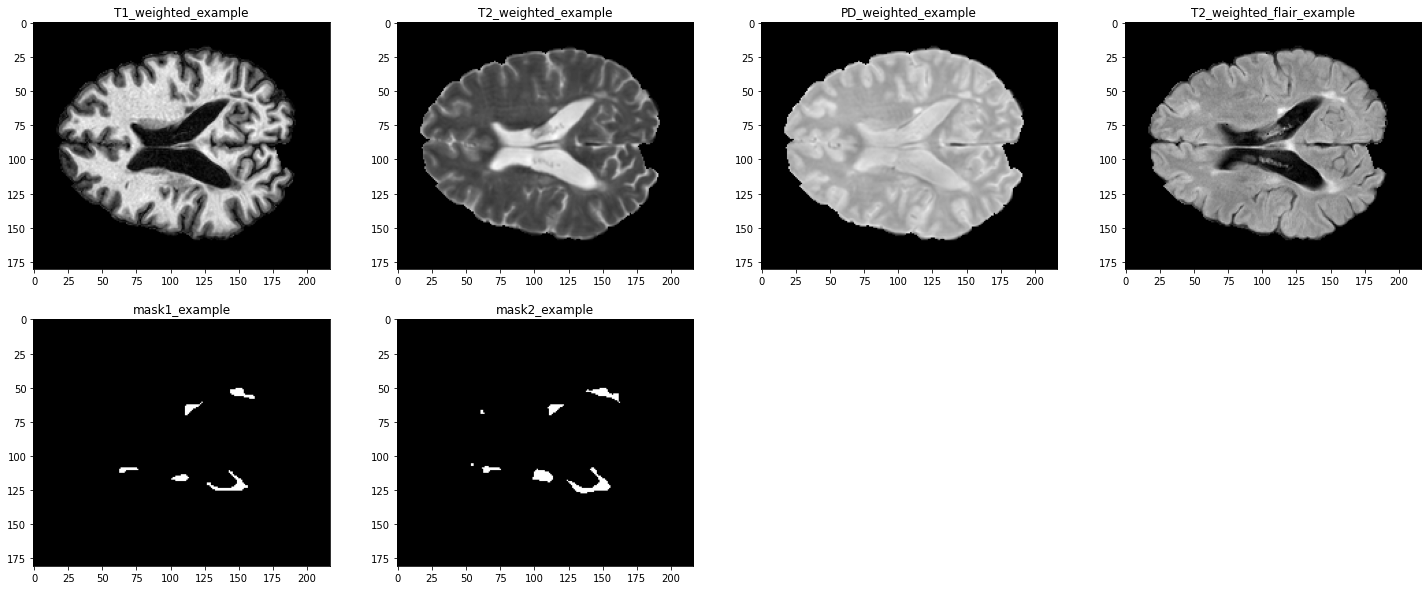

In [11]:
T1_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_mprage_pp.nii').get_data()
T2_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_t2_pp.nii').get_data()
PD_weighted_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_pd_pp.nii').get_data()
T2_weighted_flair_example = nib.load('/scratch/hp2173/training/training01/preprocessed/training01_01_flair_pp.nii').get_data()
mask1_example = nib.load('/scratch/hp2173/training/training01/masks/training01_01_mask1.nii').get_data()
mask2_example = nib.load('/scratch/hp2173/training/training01/masks/training01_01_mask2.nii').get_data()
plt.figure(figsize=(25,10))
plt.subplot(2,4,1)
plt.imshow(T1_weighted_example[:,:,90],'gray')
plt.title('T1_weighted_example')
plt.subplot(2,4,2)
plt.imshow(T2_weighted_example[:,:,90],'gray')
plt.title('T2_weighted_example')
plt.subplot(2,4,3)
plt.imshow(PD_weighted_example[:,:,90],'gray')
plt.title('PD_weighted_example')
plt.subplot(2,4,4)
plt.imshow(T2_weighted_flair_example[:,:,90],'gray')
plt.title('T2_weighted_flair_example')
plt.subplot(2,4,5)
plt.imshow(mask1_example[:,:,90],'gray')
plt.title('mask1_example')
plt.subplot(2,4,6)
plt.imshow(mask2_example[:,:,90],'gray')
plt.title('mask2_example')

plt.pause(3)

In [12]:
# ipywidgets for some interactive plots
from ipywidgets.widgets import * 
import ipywidgets as widgets
# slide through dicom images using a slide bar 
def dicom_animation(x):
    plt.figure(figsize=(20,10))
    plt.imshow(T1_weighted_example[:,:,x],'gray')
    return x
interact(dicom_animation, x=(0, len(T1_weighted_example)-1))

interactive(children=(IntSlider(value=90, description='x', max=180), Output()), _dom_classes=('widget-interact…

<function __main__.dicom_animation(x)>

## 2) Define function to process 2 raters' groundtruth  

In [3]:
def weight_ground_truth(mask1_path, mask2_path):
  mask1=nib.load(mask1_path).get_data()
  mask2=nib.load(mask2_path).get_data()
  if mask1.shape==mask2.shape:
    fig_shape = mask1.shape 
  else:
    print('Number inconformity for mask, double check path!')
  
  n=fig_shape[2]

  mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
  mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
  mask_rnd_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)

  for i in range(n):
    mask_and_weight[:,:,i] = mask1[:,:,i] & mask2[:,:,i]
    mask_or_weight[:,:,i] = mask1[:,:,i] | mask2[:,:,i]
    mask_rnd_weight = (mask_or_weight - mask_and_weight)*np.random.randint(0,2,(fig_shape[0],fig_shape[1],n)) + mask_and_weight


  return mask_and_weight, mask_or_weight, mask_rnd_weight


<ipython-input-6-527bb657da25>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask1=nib.load(mask1_path).get_data()
<ipython-input-6-527bb657da25>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask2=nib.load(mask2_path).get_data()


Text(0.5, 1.0, 'mask_rnd_weight')

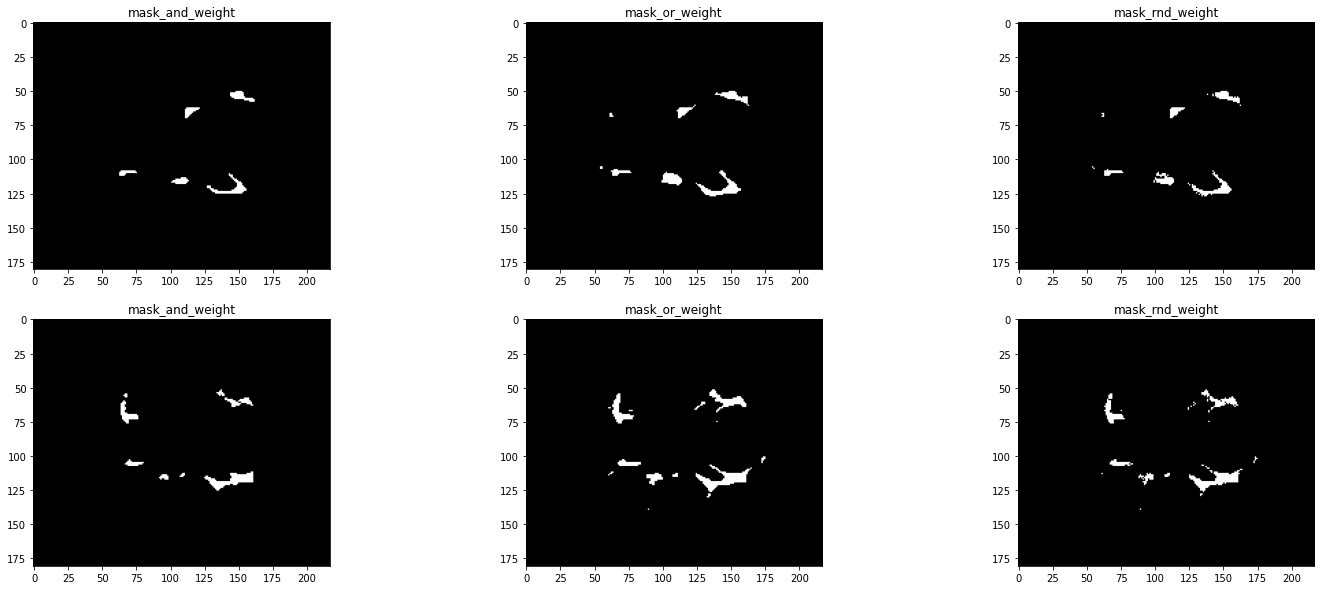

In [7]:
root = '/scratch/hp2173/training/'
#mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
#mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
mask1_path = os.path.join(root,'training01/masks/training01_01_mask1.nii')
mask2_path = os.path.join(root,'training01/masks/training01_01_mask2.nii')
mask3_path = os.path.join(root,'training02/masks/training02_02_mask1.nii')
mask4_path = os.path.join(root,'training02/masks/training02_02_mask2.nii')

mask_and_weight, mask_or_weight, mask_rnd_weight = weight_ground_truth(mask1_path, mask2_path)
mask_and_weight2, mask_or_weight2, mask_rnd_weight2 = weight_ground_truth(mask3_path, mask4_path)

plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
plt.imshow(mask_and_weight[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(2,3,2)
plt.imshow(mask_or_weight[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(2,3,3)
plt.imshow(mask_rnd_weight[:,:,90],'gray')
plt.title('mask_rnd_weight')
plt.subplot(2,3,4)
plt.imshow(mask_and_weight2[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(2,3,5)
plt.imshow(mask_or_weight2[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(2,3,6)
plt.imshow(mask_rnd_weight2[:,:,90],'gray')
plt.title('mask_rnd_weight')

<ipython-input-6-527bb657da25>:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask1=nib.load(mask1_path).get_data()
<ipython-input-6-527bb657da25>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mask2=nib.load(mask2_path).get_data()


Text(0.5, 1.0, 'mask_rnd_weight')

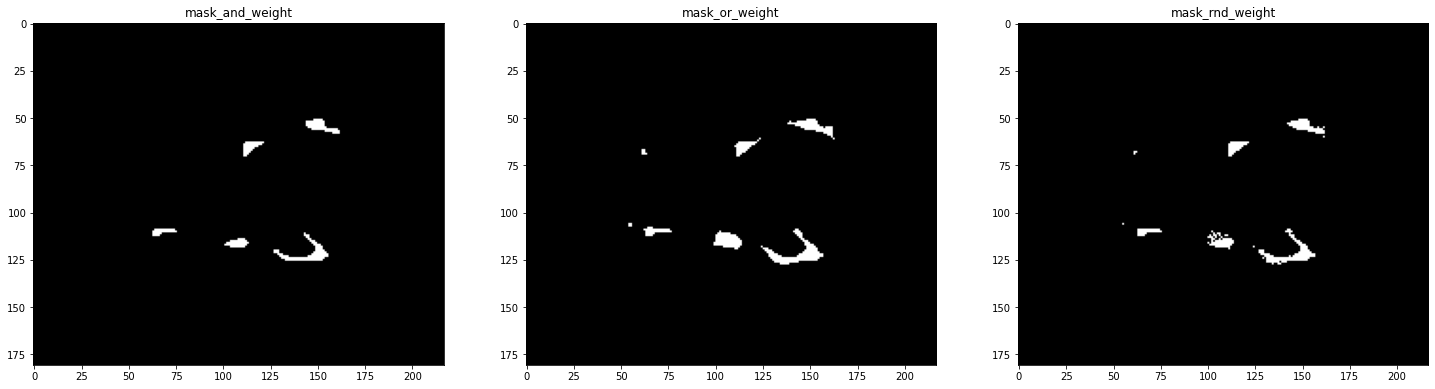

In [8]:
root = '/content/gdrive/MyDrive/ImageVedioPrecessingProject/training/'
#mask_or_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)
#mask_and_weight=np.zeros((fig_shape[0], fig_shape[1], n), dtype=np.int)


mask_and_weight, mask_or_weight, mask_rnd_weight = weight_ground_truth(mask1_path, mask2_path)
plt.figure(figsize=(25,10))
plt.subplot(1,3,1)
plt.imshow(mask_and_weight[:,:,90],'gray')
plt.title('mask_and_weight')
plt.subplot(1,3,2)
plt.imshow(mask_or_weight[:,:,90],'gray')
plt.title('mask_or_weight')
plt.subplot(1,3,3)
plt.imshow(mask_rnd_weight[:,:,90],'gray')
plt.title('mask_rnd_weight')

## 3) Make the custom dataset

In [4]:
import glob

In [5]:
base_path = '/scratch/hp2173/training/'
second_path_list = ['training01/','training02/','training03/','training04/','training05/']
mri_list = []
mask1_list = []
mask2_list = []
for i in range(5):
    timepoint1_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_01_*.nii')
    timepoint2_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_02_*.nii')
    timepoint3_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_03_*.nii')
    timepoint4_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_04_*.nii')
    if i==2:
        timepoint5_path = os.path.join(base_path, second_path_list[i], 'preprocessed/*_05_*.nii')
    mask1_path = os.path.join(base_path, second_path_list[i], 'masks/*1.nii')
    mask2_path = os.path.join(base_path, second_path_list[i], 'masks/*2.nii')
    timepoint1_list = sorted(glob.glob(timepoint1_path))
    timepoint2_list = sorted(glob.glob(timepoint2_path))
    timepoint3_list = sorted(glob.glob(timepoint3_path))
    timepoint4_list = sorted(glob.glob(timepoint4_path))
    if i==2:
        timepoint5_list = sorted(glob.glob(timepoint5_path))
    mri_list.append(timepoint1_list)
    mri_list.append(timepoint2_list)
    mri_list.append(timepoint3_list)
    mri_list.append(timepoint4_list)
    if i==2:
        mri_list.append(timepoint5_list)
    mask1_list = mask1_list + sorted(glob.glob(mask1_path))
    mask2_list = mask2_list + sorted(glob.glob(mask2_path))
print('Data Collected:', len(mri_list))
print('Mask1 Collected:', len(mask1_list))
print('Mask2 Collected:', len(mask2_list))

Data Collected: 21
Mask1 Collected: 21
Mask2 Collected: 21


<ipython-input-15-bbfdd6332bd2>:11: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  ex = nib.load(mri_list[0][index+i]).get_data()
<ipython-input-15-bbfdd6332bd2>:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  ms1 = nib.load(mask1_list[0]).get_data()
<ipython-input-15-bbfdd6332bd2>:13: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.

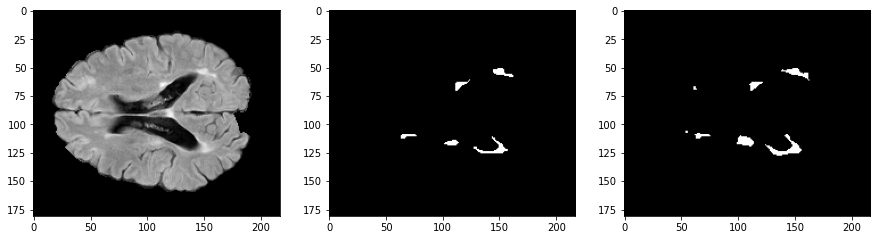

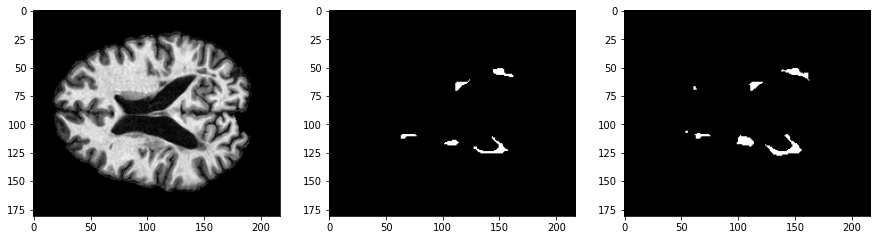

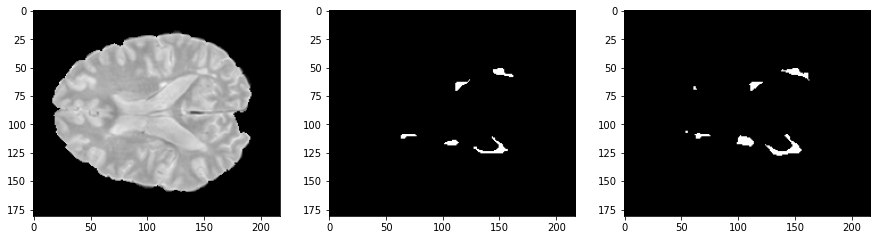

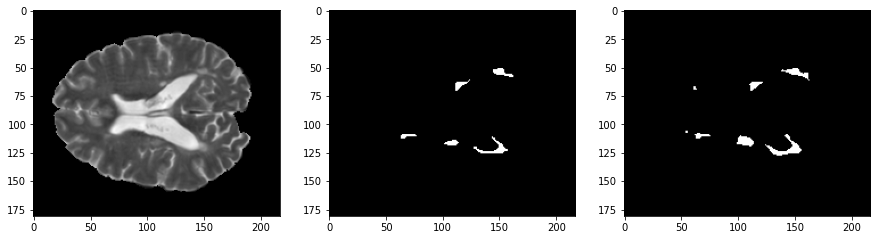

In [15]:
# 0-3:training 1(4 time points)
# 4-7:training 2(4 time points)
# 8-12:training 3(5 time points)
# 13-16:training 4(4 time points)
# 17-20:training 5(4 time points)
# order in one training set: t2_flair_weight, t1_weight, pd_weight, t2_weight

#Display one timepoint(4 type MRI) for one of the training set
index = 0
for i in range(4):
    ex = nib.load(mri_list[0][index+i]).get_data()
    ms1 = nib.load(mask1_list[0]).get_data()
    ms2 = nib.load(mask2_list[0]).get_data()
    plt.figure(figsize=(15,25))
    plt.subplot(5,3,3*i+1)
    plt.imshow(ex[:,:,90],'gray')
    plt.subplot(5,3,3*i+2)
    plt.imshow(ms1[:,:,90],'gray')
    plt.subplot(5,3,3*i+3)
    plt.imshow(ms2[:,:,90],'gray')

In [6]:
from random import shuffle
def shuffle_two_lists(listA, listB, listC):
  temp = list(zip(listA, listB, listC))
  shuffle(temp)
  return zip(*temp)
train_split_ratio = 0.8
test_split_ratio = 0.1
num_samples = len(mri_list)

train_size = int(num_samples * train_split_ratio)
test_size = int(num_samples * test_split_ratio)
val_size = num_samples - train_size - test_size
mri_list_shuffled, mask1_list_shuffled, mask2_list_shuffled = shuffle_two_lists(mri_list, mask1_list, mask2_list)

train_img_list, train_label1_list, train_label2_list = mri_list_shuffled[:train_size], mask1_list_shuffled[:train_size], mask2_list_shuffled[:train_size]
val_img_list, val_label1_list, val_label2_list = mri_list_shuffled[train_size:train_size+ val_size], mask1_list_shuffled[train_size:train_size + val_size], mask2_list_shuffled[train_size:train_size + val_size]
test_img_list, test_label1_list, test_label2_list = mri_list_shuffled[train_size+ val_size:], mask1_list_shuffled[train_size+ val_size:], mask2_list_shuffled[train_size+ val_size:]

print ("Training set size: {}". format(len(train_img_list)))
print ("Validation set size: {}". format(len(val_img_list)))
print ("Test set size: {}". format(len(test_img_list)))

Training set size: 16
Validation set size: 3
Test set size: 2


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torchvision import transforms, datasets
from torch.utils.data import Dataset
from tqdm import tqdm

class MRIDataset(Dataset):
    def __init__(self, img_path_list, label1_path_list, label2_path_list, RULE = 'and', IF_TRAIN= False):
        self.mri_path_list = img_path_list
        self.label1_path_list = label1_path_list
        self.label2_path_list = label2_path_list
        self.rule = RULE
        self.IF_TRAIN = IF_TRAIN
        #self.transform=transforms.Compose([transforms.Normalize((0.5,),(0.5,))])
        self.mri_list, self.mask1_list, self.mask2_list, self.mask_and_list, self.mask_or_list, self.mask_rnd_list = self.preprocess() 

    def __len__(self):
        return len(self.mri_list)

    def preprocess(self):
        mri_list, mask1_list, mask2_list, mask_and_list, mask_or_list, mask_rnd_list = [], [], [], [], [], []
        for idx in tqdm(range(len(self.mri_path_list))):
            mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
            mri_t2f = (mri_t2f-mri_t2f.min())/(mri_t2f.max()-mri_t2f.min())
            
            mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
            mri_t1w = (mri_t1w-mri_t1w.min())/(mri_t1w.max()-mri_t1w.min())
            
            mri_pd = torch.Tensor(nib.load(self.mri_path_list[idx][2]).get_data())
            mri_pd = (mri_pd-mri_pd.min())/(mri_pd.max()-mri_pd.min())
            
            mri_t2w = torch.Tensor(nib.load(self.mri_path_list[idx][3]).get_data())
            mri_t2w = (mri_t2w-mri_t2w.min())/(mri_t2w.max()-mri_t2w.min())
            
            mri = torch.cat((mri_t1w.unsqueeze(0),mri_t2w.unsqueeze(0),mri_pd.unsqueeze(0),mri_t2f.unsqueeze(0)),axis=0)
            #mri = self.transform(mri)
            mask_and, mask_or, mask_rnd = weight_ground_truth(self.label1_path_list[idx], self.label2_path_list[idx])
            mask1 = torch.Tensor(nib.load(self.label1_path_list[idx]).get_data())
            mask2 = torch.Tensor(nib.load(self.label2_path_list[idx]).get_data())
            
            mri_list.append(mri)
            mask1_list.append(mask1)
            mask2_list.append(mask2)
            mask_and_list.append(mask_and)
            mask_or_list.append(mask_or)
            mask_rnd_list.append(mask_rnd)
        return mri_list, mask1_list, mask2_list, mask_and_list, mask_or_list, mask_rnd_list

    def __getitem__ (self,idx):
        img = self.mri_list[idx]
        if self.rule=='and':
            mask = self.mask_and_list[idx]
        elif self.rule=='or':
            mask = self.mask_or_list[idx]
        elif self.rule=='random':
            mask = self.mask_rnd_list[idx]
        elif self.rule=='mask1':
            mask = self.mask1_list[idx]
        elif self.rule=='mask2':
            mask = self.mask2_list[idx]
            
        label = torch.Tensor(mask)

        return img, label

In [8]:
dataset = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'and', IF_TRAIN= True)

  0%|          | 0/2 [00:00<?, ?it/s]<ipython-input-7-976d5a4983b3>:25: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-7-976d5a4983b3>:28: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-7-976d5a4983b3>:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predi

torch.Size([4, 181, 217, 181])
torch.Size([181, 217, 181])
1.0
1.0
1.0
1.0


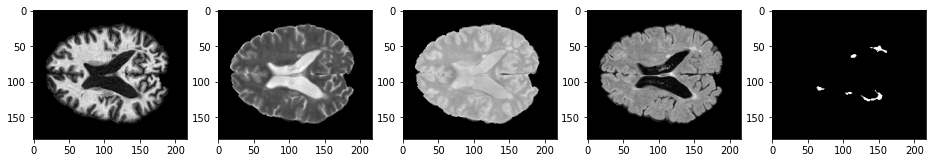

In [9]:
img, mask = dataset[0]
print(img.shape)
print(mask.shape)
plt.figure(figsize = (16,32))
plt.subplot(1,5,1)
plt.imshow(img[0,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.subplot(1,5,2)
plt.imshow(img[1,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.subplot(1,5,3)
plt.imshow(img[2,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.subplot(1,5,4)
plt.imshow(img[3,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.subplot(1,5,5)
plt.imshow(mask.cpu().numpy()[:,:,90],'gray')
print(img[0,:,:,:].cpu().numpy().max())
print(img[1,:,:,:].cpu().numpy().max())
print(img[2,:,:,:].cpu().numpy().max())
print(img[3,:,:,:].cpu().numpy().max())

In [8]:
train_dataset = MRIDataset(train_img_list, train_label1_list, train_label2_list, RULE = 'or', IF_TRAIN= True)
val_dataset = MRIDataset(val_img_list, val_label1_list, val_label2_list, RULE = 'or', IF_TRAIN= False)
test_dataset = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'or', IF_TRAIN= False)

  0%|          | 0/16 [00:00<?, ?it/s]<ipython-input-7-976d5a4983b3>:25: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-7-976d5a4983b3>:28: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-7-976d5a4983b3>:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more pred

In [19]:
NUM_EPOCH = 400
BATCH_SIZE = 4
LR = 0.0001
SAVE_PATH = "/scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/"

In [10]:
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=BATCH_SIZE, 
                                           shuffle=True, 
                                           num_workers=0)
val_loader = torch.utils.data.DataLoader(val_dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)

# 3.Build the Network

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [12]:
class SelfAttention_3D(nn.Module):
    def __init__(self, feature_dims, dim_q):
        super(SelfAttention_3D, self).__init__()
        self.fc_q1 = nn.Linear(feature_dims, dim_q)
        self.fc_k1 = nn.Linear(feature_dims, dim_q)
        self.fc_v1 = nn.Linear(feature_dims, dim_q)
        
        self.fc_q2 = nn.Linear(feature_dims, dim_q)
        self.fc_k2 = nn.Linear(feature_dims, dim_q)
        self.fc_v2 = nn.Linear(feature_dims, dim_q)
        
        self.fc_q3 = nn.Linear(feature_dims, dim_q)
        self.fc_k3 = nn.Linear(feature_dims, dim_q)
        self.fc_v3 = nn.Linear(feature_dims, dim_q)
        
        self.fc_o = nn.Linear(3*dim_q, feature_dims)

    def forward(self, input_data):
        # Expect input_data to be of shape (batch_size, channels, l, w, h).
        batch_size, channels, l, w, h  = input_data.size()
        # (batch_size, n_pixels, channels)
        input_data = input_data.flatten().reshape(batch_size, channels, -1)

        # Linear transforms(head_1).
        queries1 = self.fc_q1(input=input_data)  # (batch_size, feature_dims, dim_q)
        keys1 = self.fc_k1(input=input_data)  # (batch_size, feature_dims, dim_q)
        values1 = self.fc_v1(input=input_data)  # (batch_size, feature_dims, dim_q)
        
        # Attention matrix1.
        dot1 = torch.bmm(queries1, keys1.transpose(1, 2))  # (batch_size, channels, channels)
        scaled_dot1 = torch.div(dot1, torch.sqrt(torch.tensor(l*w*h).float())) # scale
        atten_matrix1 = F.softmax(scaled_dot1, dim=1)
        atten_weighted1 = torch.bmm(atten_matrix1, values1)
        
        # Linear transforms(head_2).
        queries2 = self.fc_q2(input=input_data)  # (batch_size, feature_dims, dim_q)
        keys2 = self.fc_k2(input=input_data)  # (batch_size, feature_dims, dim_q)
        values2 = self.fc_v2(input=input_data)  # (batch_size, feature_dims, dim_q)
        
        # Attention matrix2.
        dot2 = torch.bmm(queries2, keys2.transpose(1, 2))  # (batch_size, channels, channels)
        scaled_dot2 = torch.div(dot2, torch.sqrt(torch.tensor(l*w*h).float())) # scale
        atten_matrix2 = F.softmax(scaled_dot2, dim=1)
        atten_weighted2 = torch.bmm(atten_matrix2, values2)
        
        # Linear transforms(head_3).
        queries3 = self.fc_q3(input=input_data)  # (batch_size, feature_dims, dim_q)
        keys3 = self.fc_k3(input=input_data)  # (batch_size, feature_dims, dim_q)
        values3 = self.fc_v3(input=input_data)  # (batch_size, feature_dims, dim_q)
        
        # Attention matrix1.
        dot3 = torch.bmm(queries3, keys3.transpose(1, 2))  # (batch_size, channels, channels)
        scaled_dot3 = torch.div(dot3, torch.sqrt(torch.tensor(l*w*h).float())) # scale
        atten_matrix3 = F.softmax(scaled_dot3, dim=1)
        atten_weighted3 = torch.bmm(atten_matrix3, values3)
        
        catlayer = torch.cat((atten_weighted1,atten_weighted2,atten_weighted3),dim=2)
        output = self.fc_o(catlayer).flatten().reshape(batch_size, channels, l, w, h)
        
        return output

In [10]:
net = SelfAttention_3D(1000, 10)
a = torch.zeros(4, 90, 10, 10, 10)
b = net(a)
print(a.shape)
print(b.shape)

torch.Size([4, 90, 10, 10, 10])
torch.Size([4, 90, 10, 10, 10])


In [13]:
class SelfAttention_UNet(nn.Module):

    def __init__(self, in_channels, n_classes):
        super(SelfAttention_UNet, self).__init__()
        self.down1 = nn.Sequential(
            nn.Conv3d(in_channels, out_channels=8, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(8),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(16),
            nn.ReLU(inplace=True)
        )
        
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2, padding=0)
        
        self.down2 = nn.Sequential(
            nn.Conv3d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(16),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(32),
            nn.ReLU(inplace=True)
        )
        
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2, padding=0)
        
        self.down3 = nn.Sequential(
            nn.Conv3d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(32),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True),
            
            SelfAttention_3D(45*54*45,10)
        )
        
        self.pool3 = nn.MaxPool3d(kernel_size=2, stride=2, padding=0)
        
        self.bottom = nn.Sequential(
            nn.Conv3d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(128),
            nn.ReLU(inplace=True),
            
            SelfAttention_3D(22*27*22,10)
        )
     
        self.upconv3 = nn.ConvTranspose3d(in_channels=128, out_channels=64, kernel_size=3, 
                                       stride=2, padding=0, output_padding=0, bias=True, padding_mode='zeros')
        
        self.up3 = nn.Sequential(
            nn.Conv3d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(128),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True),
            
            SelfAttention_3D(45*54*45,10)
            
        )
        
        self.upconv2 = nn.ConvTranspose3d(in_channels=64, out_channels=32, kernel_size=3, 
                                       stride=2, padding=1, output_padding=1, bias=True, padding_mode='zeros')
        
        self.up2 = nn.Sequential(
            nn.Conv3d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(64),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(32),
            nn.ReLU(inplace=True),
        )
        
        self.upconv1 = nn.ConvTranspose3d(in_channels=32, out_channels=16, kernel_size=3, 
                                       stride=2, padding=0, output_padding=0, bias=True, padding_mode='zeros')
        
        self.up1 = nn.Sequential(
            nn.Conv3d(in_channels=32, out_channels=16, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(16),
            nn.ReLU(inplace=True),
            
            nn.Conv3d(in_channels=16, out_channels=8, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.BatchNorm3d(8),
            nn.ReLU(inplace=True),
        )
        
        self.out = nn.Sequential(
            nn.Conv3d(in_channels=8, out_channels=n_classes, kernel_size=3, stride=1, padding=1, bias=True, padding_mode='zeros'),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.down1(x)
        left1 = x
        x = self.pool1(x)
        
        x = self.down2(x)
        left2 = x
        x = self.pool2(x)
        
        x = self.down3(x)
        left3 = x
        x = self.pool3(x)
        
        x = self.bottom(x)
        
        x = self.upconv3(x)[:,:,:,0:-1,:]
        x = torch.cat((left3,x),dim=1)
        x = self.up3(x)
        
        x = self.upconv2(x)
        x = torch.cat((left2,x),dim=1)
        x = self.up2(x)
        
        x = self.upconv1(x)
        x = torch.cat((left1,x),dim=1)
        x = self.up1(x)
        
        x = self.out(x)

        return x

In [64]:
net = SelfAttention_UNet(4,1).to(device)
a = torch.zeros(1, 4, 181, 217, 181).to(device)
b = net(a)
print(a.shape)
print(b.shape)

torch.Size([1, 4, 181, 217, 181])
torch.Size([1, 1, 181, 217, 181])


In [22]:
'''
class SelfAttention_UNet(nn.Module):

    def __init__(self, in_channels, n_classes):
        super(SelfAttention_UNet, self).__init__()
        self.down1 = nn.Sequential(
            nn.Conv3d(in_channels, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(32),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(64),
            nn.ReLU()
        )
        
        self.pool1 = nn.MaxPool3d(kernel_size=2, stride=2, padding=0)
        
        self.down2 = nn.Sequential(
            nn.Conv3d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(64),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(128),
            nn.ReLU()
        )
        
        self.pool2 = nn.MaxPool3d(kernel_size=2, stride=2, padding=0)
        
        self.down3 = nn.Sequential(
            nn.Conv3d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(128),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(256),
            nn.ReLU(),
        )
        
        self.pool3 = nn.MaxPool3d(kernel_size=2, stride=2, padding=0)
        
        self.down4 = nn.Sequential(
            nn.Conv3d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(256),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(512),
            nn.ReLU(),
            
            SelfAttention_3D(22*27*22,10)
        )
        
        self.pool4 = nn.MaxPool3d(kernel_size=2, stride=2, padding=0)
        
        self.bottom = nn.Sequential(
            nn.Conv3d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(512),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=512, out_channels=1024, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(1024),
            nn.ReLU(),
            
            SelfAttention_3D(11*13*11,10)
        )
        
        self.upconv4 = nn.ConvTranspose3d(in_channels=1024, out_channels=512, kernel_size=3, 
                                       stride=2, padding=1, output_padding=1, bias=False, padding_mode='zeros')
        
        self.up4 = nn.Sequential(
            nn.Conv3d(in_channels=1024, out_channels=1024, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(1024),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=1024, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(512),
            nn.ReLU(),
            
            SelfAttention_3D(22*26*22,10)
        )
        
        self.upconv3 = nn.ConvTranspose3d(in_channels=512, out_channels=256, kernel_size=3, 
                                       stride=2, padding=0, output_padding=0, bias=False, padding_mode='zeros')
        
        self.up3 = nn.Sequential(
            nn.Conv3d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(512),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=512, out_channels=256, kernel_size=3, stride=1, padding=2, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(256),
            nn.ReLU(),
            
        )
        
        self.upconv2 = nn.ConvTranspose3d(in_channels=256, out_channels=128, kernel_size=3, 
                                       stride=2, padding=2, output_padding=1, bias=False, padding_mode='zeros')
        
        self.up2 = nn.Sequential(
            nn.Conv3d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(256),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=256, out_channels=128, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(128),
            nn.ReLU(),
        )
        
        self.upconv1 = nn.ConvTranspose3d(in_channels=128, out_channels=64, kernel_size=3, 
                                       stride=2, padding=0, output_padding=0, bias=False, padding_mode='zeros')
        
        self.up1 = nn.Sequential(
            nn.Conv3d(in_channels=128, out_channels=64, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(64),
            nn.ReLU(),
            
            nn.Conv3d(in_channels=64, out_channels=32, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.BatchNorm3d(32),
            nn.ReLU(),
        )
        
        self.out = nn.Sequential(
            nn.Conv3d(in_channels=32, out_channels=n_classes, kernel_size=3, stride=1, padding=1, bias=False, padding_mode='zeros'),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        x = self.down1(x)
        left1 = x
        x = self.pool1(x)
        
        x = self.down2(x)
        left2 = x
        x = self.pool2(x)
        
        x = self.down3(x)
        left3 = x[:,:,:,0:-1,:]
        x = self.pool3(x)
        
        x = self.down4(x)
        left4 = x[:,:,:,0:-1,:]
        x = self.pool4(x)
        
        x = self.bottom(x)
        
        x = self.upconv4(x)
        x = torch.cat((left4,x),dim=1)
        x = self.up4(x)
        
        x = self.upconv3(x)
        x = torch.cat((left3,x),dim=1)
        x = self.up3(x)
        
        x = self.upconv2(x)[:,:,0:-2,:,0:-2]
        x = torch.cat((left2,x),dim=1)
        x = self.up2(x)
        
        x = self.upconv1(x)
        x = torch.cat((left1,x),dim=1)
        x = self.up1(x)
        
        x = self.out(x)
        
        return x
'''

# 4.Dice Loss

In [14]:
# define dice coefficient
def dice_coeff(pred, target):
    smooth = 1
    # First let's flatten the matrix to [Batch Size, -1]
    # The flatten operation does not afftect the computation of the above equation
    num = pred.size(0)
    m1 = pred. view(num, -1). float() # Flatten
    m2 = target. view(num, -1). float() # Flatten
    # Then we compute the intersection and the sum of cardinality
    intersection = 2*torch.sum(m1*m2,dim= 1) + smooth
    cardinality = torch.sum(m1**2,dim= 1) + torch.sum(m2**2,dim= 1) + smooth
    # Followed by Dice
    dice = intersection/cardinality
    return dice.mean()
# define SoftDICE loss as 1 - SoftDICE
class SoftDICELoss(nn. Module):
    def __init__(self, smooth = 1):
        super(SoftDICELoss, self). __init__()
        self. smooth = smooth
    def forward(self, pred, target):
        loss = 1 - dice_coeff(pred, target)
        return loss.mean()

# 5.Training

In [15]:
def train_epoch(net, data_loader, optimizer, criterion, epoch):

    net = net.train()
    optimizer.zero_grad()
    loss_stat = []
    for i, img_mask in enumerate(data_loader):
        img, mask = img_mask

        img = img.to(device)
        mask = mask.to(device)

        pred = net(img)

        loss = criterion(pred, mask)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_stat += [loss.item()]*img.shape[0]
        print ("Epoch {}: [{}/{}] Loss: {:.3f}". format(epoch, len(data_loader), len(data_loader),np. mean(loss_stat)))
    return np.mean(loss_stat)

In [61]:
def eval_epoch(net, data_loader, metric, criterion):
    # set model in eval mode to avoid updating BN layer
    net = net.eval()
    
    metric_stat = []
    val_loss_stat = []
    for i, img_mask in enumerate(data_loader):
        img, mask = img_mask
        # send data to device
        img = img.to(device)
        mask = mask.to(device)
        # feed data to the model. No need to compute grad.
        with torch.no_grad():
            pred = net(img)
            val_loss = criterion(pred, mask)
            
        # eval the results using DICE function as the metric
        # Convert probability to prediction mask
        pred = pred>0.70
        err = dice_coeff(pred, mask)
        metric_stat += [err.item()]*img.shape[0]
        val_loss_stat += [val_loss.item()]*img.shape[0]
        
    print ("Dice: {:.3f}  Val Loss: {:.3f} ".format(np.mean(metric_stat), np.mean(val_loss_stat)))
    
    return np.mean(val_loss_stat), np.mean(metric_stat)

In [17]:
net = SelfAttention_UNet(4,1).to(device)
print(net)
n_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
print('Number of parameters in network: ', n_params)

SelfAttention_UNet(
  (down1): Sequential(
    (0): Conv3d(4, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down2): Sequential(
    (0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool2): MaxPool3d(kernel_size=2, stri

In [20]:
optimizer = optim.Adam(net.parameters(), lr= LR)
criterion = SoftDICELoss()
train_loss_list = []
val_loss_list = []

In [22]:
for epoch in range(NUM_EPOCH):    
    loss = train_epoch(net, train_loader, optimizer, criterion, epoch)
    val_loss, dice = eval_epoch(net, val_loader, dice_coeff, criterion)
    
    # Record losses for each epoch
    train_loss_list.append(loss)
    val_loss_list.append(val_loss)
    
    # Save the model after each epoch
    if os.path.isdir(SAVE_PATH):
        torch.save(net.state_dict(),SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1))
    else:
        os.makedirs(SAVE_PATH, exist_ok=True)
        torch.save(net.state_dict(),SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1))
    print('Checkpoint {} saved to {}'.format(epoch + 1, SAVE_PATH + 'MRISegEpoch{}.pth'.format(epoch + 1)))  

Epoch 0: [4/4] Loss: 0.991
Epoch 0: [4/4] Loss: 0.992
Epoch 0: [4/4] Loss: 0.991
Epoch 0: [4/4] Loss: 0.991
Dice: 0.005  Val Loss: 0.991 
Checkpoint 1 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch1.pth
Epoch 1: [4/4] Loss: 0.988
Epoch 1: [4/4] Loss: 0.987
Epoch 1: [4/4] Loss: 0.987
Epoch 1: [4/4] Loss: 0.989
Dice: 0.005  Val Loss: 0.991 
Checkpoint 2 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch2.pth
Epoch 2: [4/4] Loss: 0.996
Epoch 2: [4/4] Loss: 0.987
Epoch 2: [4/4] Loss: 0.988
Epoch 2: [4/4] Loss: 0.987
Dice: 0.005  Val Loss: 0.990 
Checkpoint 3 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch3.pth
Epoch 3: [4/4] Loss: 0.979
Epoch 3: [4/4] Loss: 0.984
Epoch 3: [4/4] Loss: 0.985
Epoch 3: [4/4] Loss: 0.987
Dice: 0.005  Val Loss: 0.990 
Checkpoint 4 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch4.pth
Epoch 4: [4/4] Loss: 0.985
Epoch

Epoch 33: [4/4] Loss: 0.890
Dice: 0.209  Val Loss: 0.765 
Checkpoint 34 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch34.pth
Epoch 34: [4/4] Loss: 0.828
Epoch 34: [4/4] Loss: 0.861
Epoch 34: [4/4] Loss: 0.852
Epoch 34: [4/4] Loss: 0.861
Dice: 0.320  Val Loss: 0.670 
Checkpoint 35 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch35.pth
Epoch 35: [4/4] Loss: 0.809
Epoch 35: [4/4] Loss: 0.877
Epoch 35: [4/4] Loss: 0.866
Epoch 35: [4/4] Loss: 0.887
Dice: 0.309  Val Loss: 0.685 
Checkpoint 36 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch36.pth
Epoch 36: [4/4] Loss: 0.813
Epoch 36: [4/4] Loss: 0.837
Epoch 36: [4/4] Loss: 0.850
Epoch 36: [4/4] Loss: 0.858
Dice: 0.560  Val Loss: 0.675 
Checkpoint 37 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch37.pth
Epoch 37: [4/4] Loss: 0.840
Epoch 37: [4/4] Loss: 0.824
Epoch 37: [4/4] Loss: 0.870
Epoch 37

Dice: 0.259  Val Loss: 0.733 
Checkpoint 67 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch67.pth
Epoch 67: [4/4] Loss: 0.657
Epoch 67: [4/4] Loss: 0.681
Epoch 67: [4/4] Loss: 0.656
Epoch 67: [4/4] Loss: 0.687
Dice: 0.271  Val Loss: 0.718 
Checkpoint 68 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch68.pth
Epoch 68: [4/4] Loss: 0.796
Epoch 68: [4/4] Loss: 0.739
Epoch 68: [4/4] Loss: 0.751
Epoch 68: [4/4] Loss: 0.722
Dice: 0.271  Val Loss: 0.717 
Checkpoint 69 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch69.pth
Epoch 69: [4/4] Loss: 0.686
Epoch 69: [4/4] Loss: 0.739
Epoch 69: [4/4] Loss: 0.705
Epoch 69: [4/4] Loss: 0.685
Dice: 0.268  Val Loss: 0.723 
Checkpoint 70 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch70.pth
Epoch 70: [4/4] Loss: 0.638
Epoch 70: [4/4] Loss: 0.719
Epoch 70: [4/4] Loss: 0.700
Epoch 70: [4/4] Loss: 0.697
Dice: 0.

Checkpoint 100 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch100.pth
Epoch 100: [4/4] Loss: 0.602
Epoch 100: [4/4] Loss: 0.591
Epoch 100: [4/4] Loss: 0.616
Epoch 100: [4/4] Loss: 0.606
Dice: 0.248  Val Loss: 0.729 
Checkpoint 101 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch101.pth
Epoch 101: [4/4] Loss: 0.668
Epoch 101: [4/4] Loss: 0.617
Epoch 101: [4/4] Loss: 0.677
Epoch 101: [4/4] Loss: 0.707
Dice: 0.253  Val Loss: 0.725 
Checkpoint 102 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch102.pth
Epoch 102: [4/4] Loss: 0.790
Epoch 102: [4/4] Loss: 0.786
Epoch 102: [4/4] Loss: 0.795
Epoch 102: [4/4] Loss: 0.796
Dice: 0.265  Val Loss: 0.714 
Checkpoint 103 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch103.pth
Epoch 103: [4/4] Loss: 0.605
Epoch 103: [4/4] Loss: 0.666
Epoch 103: [4/4] Loss: 0.708
Epoch 103: [4/4] Loss: 0.726
Dice: 0.704  V

Epoch 132: [4/4] Loss: 0.644
Epoch 132: [4/4] Loss: 0.610
Epoch 132: [4/4] Loss: 0.543
Epoch 132: [4/4] Loss: 0.565
Dice: 0.528  Val Loss: 0.455 
Checkpoint 133 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch133.pth
Epoch 133: [4/4] Loss: 0.578
Epoch 133: [4/4] Loss: 0.582
Epoch 133: [4/4] Loss: 0.604
Epoch 133: [4/4] Loss: 0.601
Dice: 0.480  Val Loss: 0.501 
Checkpoint 134 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch134.pth
Epoch 134: [4/4] Loss: 0.628
Epoch 134: [4/4] Loss: 0.546
Epoch 134: [4/4] Loss: 0.574
Epoch 134: [4/4] Loss: 0.575
Dice: 0.481  Val Loss: 0.517 
Checkpoint 135 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch135.pth
Epoch 135: [4/4] Loss: 0.490
Epoch 135: [4/4] Loss: 0.534
Epoch 135: [4/4] Loss: 0.532
Epoch 135: [4/4] Loss: 0.545
Dice: 0.529  Val Loss: 0.448 
Checkpoint 136 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRI

Epoch 164: [4/4] Loss: 0.463
Dice: 0.739  Val Loss: 0.235 
Checkpoint 165 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch165.pth
Epoch 165: [4/4] Loss: 0.529
Epoch 165: [4/4] Loss: 0.478
Epoch 165: [4/4] Loss: 0.457
Epoch 165: [4/4] Loss: 0.460
Dice: 0.717  Val Loss: 0.273 
Checkpoint 166 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch166.pth
Epoch 166: [4/4] Loss: 0.449
Epoch 166: [4/4] Loss: 0.432
Epoch 166: [4/4] Loss: 0.421
Epoch 166: [4/4] Loss: 0.481
Dice: 0.744  Val Loss: 0.230 
Checkpoint 167 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch167.pth
Epoch 167: [4/4] Loss: 0.394
Epoch 167: [4/4] Loss: 0.487
Epoch 167: [4/4] Loss: 0.496
Epoch 167: [4/4] Loss: 0.472
Dice: 0.737  Val Loss: 0.239 
Checkpoint 168 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch168.pth
Epoch 168: [4/4] Loss: 0.432
Epoch 168: [4/4] Loss: 0.416
Epoch 168: [4

Epoch 197: [4/4] Loss: 0.405
Epoch 197: [4/4] Loss: 0.417
Epoch 197: [4/4] Loss: 0.406
Epoch 197: [4/4] Loss: 0.446
Dice: 0.682  Val Loss: 0.345 
Checkpoint 198 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch198.pth
Epoch 198: [4/4] Loss: 0.368
Epoch 198: [4/4] Loss: 0.397
Epoch 198: [4/4] Loss: 0.413
Epoch 198: [4/4] Loss: 0.436
Dice: 0.740  Val Loss: 0.229 
Checkpoint 199 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch199.pth
Epoch 199: [4/4] Loss: 0.425
Epoch 199: [4/4] Loss: 0.393
Epoch 199: [4/4] Loss: 0.480
Epoch 199: [4/4] Loss: 0.466
Dice: 0.748  Val Loss: 0.229 
Checkpoint 200 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch200.pth
Epoch 200: [4/4] Loss: 0.399
Epoch 200: [4/4] Loss: 0.402
Epoch 200: [4/4] Loss: 0.404
Epoch 200: [4/4] Loss: 0.452
Dice: 0.748  Val Loss: 0.216 
Checkpoint 201 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRI

Epoch 229: [4/4] Loss: 0.411
Dice: 0.749  Val Loss: 0.221 
Checkpoint 230 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch230.pth
Epoch 230: [4/4] Loss: 0.416
Epoch 230: [4/4] Loss: 0.525
Epoch 230: [4/4] Loss: 0.549
Epoch 230: [4/4] Loss: 0.509
Dice: 0.672  Val Loss: 0.416 
Checkpoint 231 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch231.pth
Epoch 231: [4/4] Loss: 0.403
Epoch 231: [4/4] Loss: 0.401
Epoch 231: [4/4] Loss: 0.407
Epoch 231: [4/4] Loss: 0.423
Dice: 0.533  Val Loss: 0.452 
Checkpoint 232 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch232.pth
Epoch 232: [4/4] Loss: 0.564
Epoch 232: [4/4] Loss: 0.547
Epoch 232: [4/4] Loss: 0.550
Epoch 232: [4/4] Loss: 0.520
Dice: 0.542  Val Loss: 0.434 
Checkpoint 233 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch233.pth
Epoch 233: [4/4] Loss: 0.495
Epoch 233: [4/4] Loss: 0.440
Epoch 233: [4

Epoch 262: [4/4] Loss: 0.628
Epoch 262: [4/4] Loss: 0.527
Epoch 262: [4/4] Loss: 0.498
Epoch 262: [4/4] Loss: 0.474
Dice: 0.664  Val Loss: 0.318 
Checkpoint 263 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch263.pth
Epoch 263: [4/4] Loss: 0.599
Epoch 263: [4/4] Loss: 0.505
Epoch 263: [4/4] Loss: 0.528
Epoch 263: [4/4] Loss: 0.499
Dice: 0.651  Val Loss: 0.307 
Checkpoint 264 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch264.pth
Epoch 264: [4/4] Loss: 0.481
Epoch 264: [4/4] Loss: 0.450
Epoch 264: [4/4] Loss: 0.449
Epoch 264: [4/4] Loss: 0.450
Dice: 0.702  Val Loss: 0.277 
Checkpoint 265 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch265.pth
Epoch 265: [4/4] Loss: 0.432
Epoch 265: [4/4] Loss: 0.450
Epoch 265: [4/4] Loss: 0.440
Epoch 265: [4/4] Loss: 0.435
Dice: 0.662  Val Loss: 0.286 
Checkpoint 266 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRI

Epoch 294: [4/4] Loss: 0.231
Dice: 0.711  Val Loss: 0.259 
Checkpoint 295 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch295.pth
Epoch 295: [4/4] Loss: 0.226
Epoch 295: [4/4] Loss: 0.235
Epoch 295: [4/4] Loss: 0.227
Epoch 295: [4/4] Loss: 0.222
Dice: 0.742  Val Loss: 0.243 
Checkpoint 296 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch296.pth
Epoch 296: [4/4] Loss: 0.231
Epoch 296: [4/4] Loss: 0.287
Epoch 296: [4/4] Loss: 0.257
Epoch 296: [4/4] Loss: 0.236
Dice: 0.752  Val Loss: 0.227 
Checkpoint 297 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch297.pth
Epoch 297: [4/4] Loss: 0.196
Epoch 297: [4/4] Loss: 0.232
Epoch 297: [4/4] Loss: 0.225
Epoch 297: [4/4] Loss: 0.224
Dice: 0.749  Val Loss: 0.230 
Checkpoint 298 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch298.pth
Epoch 298: [4/4] Loss: 0.202
Epoch 298: [4/4] Loss: 0.216
Epoch 298: [4

Epoch 327: [4/4] Loss: 0.245
Epoch 327: [4/4] Loss: 0.210
Epoch 327: [4/4] Loss: 0.212
Epoch 327: [4/4] Loss: 0.205
Dice: 0.742  Val Loss: 0.218 
Checkpoint 328 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch328.pth
Epoch 328: [4/4] Loss: 0.172
Epoch 328: [4/4] Loss: 0.179
Epoch 328: [4/4] Loss: 0.189
Epoch 328: [4/4] Loss: 0.189
Dice: 0.658  Val Loss: 0.277 
Checkpoint 329 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch329.pth
Epoch 329: [4/4] Loss: 0.172
Epoch 329: [4/4] Loss: 0.177
Epoch 329: [4/4] Loss: 0.204
Epoch 329: [4/4] Loss: 0.207
Dice: 0.696  Val Loss: 0.264 
Checkpoint 330 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch330.pth
Epoch 330: [4/4] Loss: 0.211
Epoch 330: [4/4] Loss: 0.218
Epoch 330: [4/4] Loss: 0.209
Epoch 330: [4/4] Loss: 0.204
Dice: 0.763  Val Loss: 0.200 
Checkpoint 331 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRI

Epoch 359: [4/4] Loss: 0.174
Dice: 0.769  Val Loss: 0.190 
Checkpoint 360 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch360.pth
Epoch 360: [4/4] Loss: 0.143
Epoch 360: [4/4] Loss: 0.169
Epoch 360: [4/4] Loss: 0.181
Epoch 360: [4/4] Loss: 0.174
Dice: 0.785  Val Loss: 0.183 
Checkpoint 361 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch361.pth
Epoch 361: [4/4] Loss: 0.211
Epoch 361: [4/4] Loss: 0.200
Epoch 361: [4/4] Loss: 0.189
Epoch 361: [4/4] Loss: 0.176
Dice: 0.784  Val Loss: 0.180 
Checkpoint 362 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch362.pth
Epoch 362: [4/4] Loss: 0.165
Epoch 362: [4/4] Loss: 0.174
Epoch 362: [4/4] Loss: 0.193
Epoch 362: [4/4] Loss: 0.180
Dice: 0.783  Val Loss: 0.183 
Checkpoint 363 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch363.pth
Epoch 363: [4/4] Loss: 0.207
Epoch 363: [4/4] Loss: 0.184
Epoch 363: [4

Epoch 392: [4/4] Loss: 0.158
Epoch 392: [4/4] Loss: 0.190
Epoch 392: [4/4] Loss: 0.178
Epoch 392: [4/4] Loss: 0.173
Dice: 0.783  Val Loss: 0.184 
Checkpoint 393 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch393.pth
Epoch 393: [4/4] Loss: 0.187
Epoch 393: [4/4] Loss: 0.186
Epoch 393: [4/4] Loss: 0.178
Epoch 393: [4/4] Loss: 0.177
Dice: 0.794  Val Loss: 0.177 
Checkpoint 394 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch394.pth
Epoch 394: [4/4] Loss: 0.160
Epoch 394: [4/4] Loss: 0.157
Epoch 394: [4/4] Loss: 0.178
Epoch 394: [4/4] Loss: 0.168
Dice: 0.780  Val Loss: 0.177 
Checkpoint 395 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch395.pth
Epoch 395: [4/4] Loss: 0.185
Epoch 395: [4/4] Loss: 0.167
Epoch 395: [4/4] Loss: 0.168
Epoch 395: [4/4] Loss: 0.166
Dice: 0.786  Val Loss: 0.181 
Checkpoint 396 saved to /scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRI

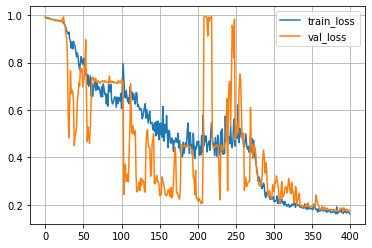

In [23]:
# Plot training loss and validation loss
plt.grid('on')
plt.plot(np.arange(NUM_EPOCH),train_loss_list,label='train_loss')
plt.plot(np.arange(NUM_EPOCH),val_loss_list, label='val_loss')
plt.legend()

# 6.Test

## Reload the model

In [25]:
checkpoint_path = '/scratch/hp2173/mri/SelfAttention_U-net_Bothside_3D_model_backup/MRISegEpoch394.pth'
net = SelfAttention_UNet(4,1).to(device)
net.load_state_dict(torch.load(checkpoint_path))
net.eval()

SelfAttention_UNet(
  (down1): Sequential(
    (0): Conv3d(4, 8, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(8, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool1): MaxPool3d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (down2): Sequential(
    (0): Conv3d(16, 16, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv3d(16, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (4): BatchNorm3d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
  )
  (pool2): MaxPool3d(kernel_size=2, stri

## Reload the data with mask1 and mask2

In [26]:
test_dataset_mask1 = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'mask1', IF_TRAIN= False)
test_dataset_mask2 = MRIDataset(test_img_list, test_label1_list, test_label2_list, RULE = 'mask2', IF_TRAIN= False)

  0%|          | 0/2 [00:00<?, ?it/s]<ipython-input-7-976d5a4983b3>:25: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-7-976d5a4983b3>:28: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-7-976d5a4983b3>:31: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predi

In [27]:
test_loader_mask1 = torch.utils.data.DataLoader(test_dataset_mask1, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)
test_loader_mask2 = torch.utils.data.DataLoader(test_dataset_mask2, 
                                         batch_size=BATCH_SIZE, 
                                         shuffle=False, 
                                         num_workers=0)

## Test with mask1 and mask2

In [62]:
test_loss, test_dice = eval_epoch(net, test_loader_mask1, dice_coeff, criterion)
test_loss, test_dice = eval_epoch(net, test_loader_mask2, dice_coeff, criterion)

Dice: 0.733  Val Loss: 0.273 
Dice: 0.784  Val Loss: 0.200 


## Dispaly the output mask

In [63]:
img, mask1 = test_dataset_mask1[0]
img, mask2 = test_dataset_mask2[0]
result = net(img.unsqueeze(0).to(device)).detach()
mask_pred = result.cpu().numpy()[0,0,:,:,:]
mask_pred[mask_pred>0.7] = 1
mask_pred[mask_pred<=0.7] = 0
print(mask_pred.shape)

(181, 217, 181)


Manual Volume for mask1: 5335.0
Manual Volume for mask2: 7356.0
Segmentation Volume: 6835.0


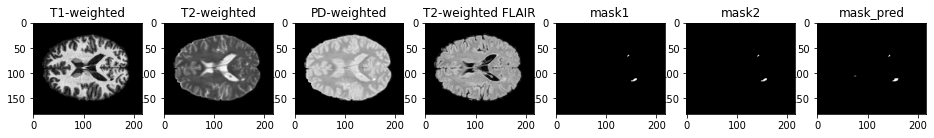

In [64]:
plt.figure(figsize = (16,32))
plt.subplot(1,7,1)
plt.imshow(img[0,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T1-weighted')
plt.subplot(1,7,2)
plt.imshow(img[1,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted')
plt.subplot(1,7,3)
plt.imshow(img[2,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('PD-weighted')
plt.subplot(1,7,4)
plt.imshow(img[3,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted FLAIR')
plt.subplot(1,7,5)
plt.imshow(mask1.cpu().numpy()[:,:,90],'gray')
plt.title('mask1')
plt.subplot(1,7,6)
plt.imshow(mask1.cpu().numpy()[:,:,90],'gray')
plt.title('mask2')
plt.subplot(1,7,7)
plt.imshow(mask_pred[:,:,90],'gray')
plt.title('mask_pred')

print('Manual Volume for mask1:',mask1.cpu().numpy().sum())
print('Manual Volume for mask2:',mask2.cpu().numpy().sum())
print('Segmentation Volume:',mask_pred.sum())

In [65]:
### img, mask1 = test_dataset_mask1[1]
img, mask2 = test_dataset_mask2[1]
result = net(img.unsqueeze(0).to(device)).detach()
mask_pred = result.cpu().numpy()[0,0,:,:,:]
mask_pred[mask_pred>0.7] = 1
mask_pred[mask_pred<=0.7] = 0
print(mask_pred.shape)

(181, 217, 181)


Manual Volume for mask1: 5335.0
Manual Volume for mask2: 3123.0
Segmentation Volume: 3022.0


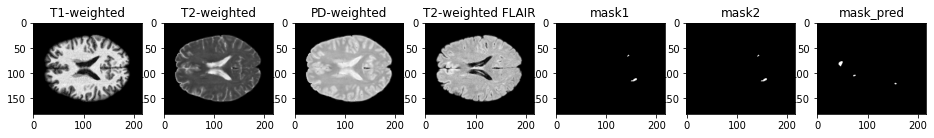

In [66]:
plt.figure(figsize = (16,32))
plt.subplot(1,7,1)
plt.imshow(img[0,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T1-weighted')
plt.subplot(1,7,2)
plt.imshow(img[1,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted')
plt.subplot(1,7,3)
plt.imshow(img[2,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('PD-weighted')
plt.subplot(1,7,4)
plt.imshow(img[3,:,:,:].cpu().numpy()[:,:,90],'gray')
plt.title('T2-weighted FLAIR')
plt.subplot(1,7,5)
plt.imshow(mask1.cpu().numpy()[:,:,90],'gray')
plt.title('mask1')
plt.subplot(1,7,6)
plt.imshow(mask1.cpu().numpy()[:,:,90],'gray')
plt.title('mask2')
plt.subplot(1,7,7)
plt.imshow(mask_pred[:,:,90],'gray')
plt.title('mask_pred')

print('Manual Volume for mask1:',mask1.cpu().numpy().sum())
print('Manual Volume for mask2:',mask2.cpu().numpy().sum())
print('Segmentation Volume:',mask_pred.sum())

## Comparing with original and preprocessed

In [67]:
test_datapath = '/scratch/hp2173/testdata_website'

In [68]:
class MRITestDataset(Dataset):
    def __init__(self, img_path_list, IF_TRAIN= False):
        self.mri_path_list = img_path_list
        self.IF_TRAIN = IF_TRAIN
        #self.transform=transforms.Compose([transforms.Normalize((0.5,),(0.5,))])
        self.mri_list = self.preprocess() 

    def __len__(self):
        return len(self.mri_list)

    def preprocess(self):
        mri_list = []
        for idx in tqdm(range(len(self.mri_path_list))):
            mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
            mri_t2f = (mri_t2f-mri_t2f.min())/(mri_t2f.max()-mri_t2f.min())
            
            mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
            mri_t1w = (mri_t1w-mri_t1w.min())/(mri_t1w.max()-mri_t1w.min())
            
            mri_pd = torch.Tensor(nib.load(self.mri_path_list[idx][2]).get_data())
            mri_pd = (mri_pd-mri_pd.min())/(mri_pd.max()-mri_pd.min())
            
            mri_t2w = torch.Tensor(nib.load(self.mri_path_list[idx][3]).get_data())
            mri_t2w = (mri_t2w-mri_t2w.min())/(mri_t2w.max()-mri_t2w.min())
            
            mri = torch.cat((mri_t1w.unsqueeze(0),mri_t2w.unsqueeze(0),mri_pd.unsqueeze(0),mri_t2f.unsqueeze(0)),axis=0)
        
            
            mri_list.append(mri)

        return mri_list

    def __getitem__ (self,idx):
        img = self.mri_list[idx]
        return img

In [69]:
second_testing_path_list = []
for i in range(1,15):
    if i<10:
        second_testing_path_list.append('test0' + str(i) + '/')
    else:
        second_testing_path_list.append('test' + str(i) + '/')
        
print(second_testing_path_list)
mri_test_list = []

for i in range(14):
    timepoint1_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_01_*.nii')
    timepoint2_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_02_*.nii')
    timepoint3_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_03_*.nii')
    timepoint4_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_04_*.nii')
    if (i==1 or i==9 or i==10 or i==13):
        timepoint5_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_05_*.nii')
    if i==9: 
        timepoint6_path = os.path.join(test_datapath, second_testing_path_list[i], 'preprocessed/*_06_*.nii') 
        print(timepoint6_path)
    
    timepoint1_list = sorted(glob.glob(timepoint1_path))
    timepoint2_list = sorted(glob.glob(timepoint2_path))
    timepoint3_list = sorted(glob.glob(timepoint3_path))
    timepoint4_list = sorted(glob.glob(timepoint4_path))

    
    if (i==1 or i==9 or i==10 or i==13):
        timepoint5_list = sorted(glob.glob(timepoint5_path))
    if i==9:
        timepoint6_list = sorted(glob.glob(timepoint6_path))
    
    mri_test_list.append(timepoint1_list)
    mri_test_list.append(timepoint2_list)
    mri_test_list.append(timepoint3_list)
    mri_test_list.append(timepoint4_list)

    if (i==1 or i==9 or i==10 or i==13):
        mri_test_list.append(timepoint5_list)

    if i==9:
        mri_test_list.append(timepoint6_list)
        

print('Data Collected:', len(mri_test_list))

['test01/', 'test02/', 'test03/', 'test04/', 'test05/', 'test06/', 'test07/', 'test08/', 'test09/', 'test10/', 'test11/', 'test12/', 'test13/', 'test14/']
/scratch/hp2173/testdata_website/test10/preprocessed/*_06_*.nii
Data Collected: 61


In [70]:
test_dataset = MRITestDataset(mri_test_list, IF_TRAIN= True)

  0%|          | 0/61 [00:00<?, ?it/s]<ipython-input-68-cca191b18e00>:14: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t2f = torch.Tensor(nib.load(self.mri_path_list[idx][0]).get_data())
<ipython-input-68-cca191b18e00>:17: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  mri_t1w = torch.Tensor(nib.load(self.mri_path_list[idx][1]).get_data())
<ipython-input-68-cca191b18e00>:20: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more p

In [72]:
test_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=1, 
                                         shuffle=False, 
                                         num_workers=0)

In [73]:
def pre_and_save(net, dataloader):
    net = net.eval()
    num_list = [4,5,4,4,4,4,4,4,4,6,5,4,4,5]
    cnt_num = 0;
    cnt = 0;
    for i, test_input in enumerate(dataloader):
        test_input = test_input.to(device)
        with torch.no_grad():
            pred = net(test_input[0].unsqueeze(0).to(device)).detach()
            pred[pred>0.7] = 1
            pred[pred<=0.7] = 0
            pred = pred.cpu().numpy().squeeze()
            new_image = nib.Nifti1Image(pred, np.eye(4)) 
            
        if (cnt == num_list[cnt_num]):
            cnt_num += 1
            cnt = 0;
        if i < 37:
            nib.save(new_image, '/scratch/hp2173/mri/results/self_attention_bothside_3d_unet_lr0.0001/' + 'test0' + str(cnt_num+1) + '_0' + str(cnt+1)+ '_NYU.nii')
        else:
            nib.save(new_image, '/scratch/hp2173/mri/results/self_attention_bothside_3d_unet_lr0.0001/' + 'test' + str(cnt_num+1) + '_0' + str(cnt+1)+ '_NYU.nii')
        cnt = cnt+1

In [74]:
num_list = [4,5,4,4,4,4,4,4,4,6,5,4,4,5]
print(sum(num_list))

61


In [76]:
pre_and_save(net, test_loader)

(181, 217, 181)


<ipython-input-77-b20edb7c8e2e>:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  testimg = nib.load('/scratch/hp2173/mri/results/self_attention_bothside_3d_unet_lr0.0001/test12_02_NYU.nii').get_data()


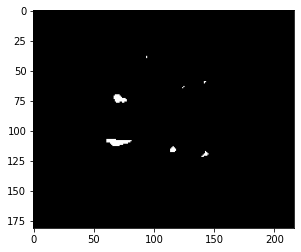

In [77]:
testimg = nib.load('/scratch/hp2173/mri/results/self_attention_bothside_3d_unet_lr0.0001/test12_02_NYU.nii').get_data()
print(testimg.shape)
plt.imshow(testimg[:,:,90], cmap='gray')